In [1]:
library(testthat)
library(tidyverse)
library(proto)
library(pryr)
library(repr)
library(plotly)
library(GGally)
library(gridExtra)
library(gcookbook)
library(lubridate)
library(MASS)
library(gclus)
library(vcd)

options(repr.plot.width=10, repr.plot.height=6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.5
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::is_null() masks testthat::is_null()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::matches() masks testthat::matches()

Attaching package: ‘pryr’

The following objects are masked from ‘package:purrr’:

    compose, partial


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout


Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

  

In [2]:
painters.df <- read.csv(file = "painters.csv", 
                     header = TRUE, 
                     sep = ",")
#head(painters.df)
#tail(painters.df)
painters.df

Artist,Composition,Drawing,Colour,Expression,School
Da Udine,10,8,16,3,A
Da Vinci,15,16,4,14,A
Del Piombo,8,13,16,7,A
Del Sarto,12,16,9,8,A
Fr. Penni,0,15,8,0,A
Guilio Romano,15,16,4,14,A
Michelangelo,8,17,4,8,A
Perino del Vaga,15,16,7,6,A
Perugino,4,12,10,4,A
Raphael,17,18,12,18,A


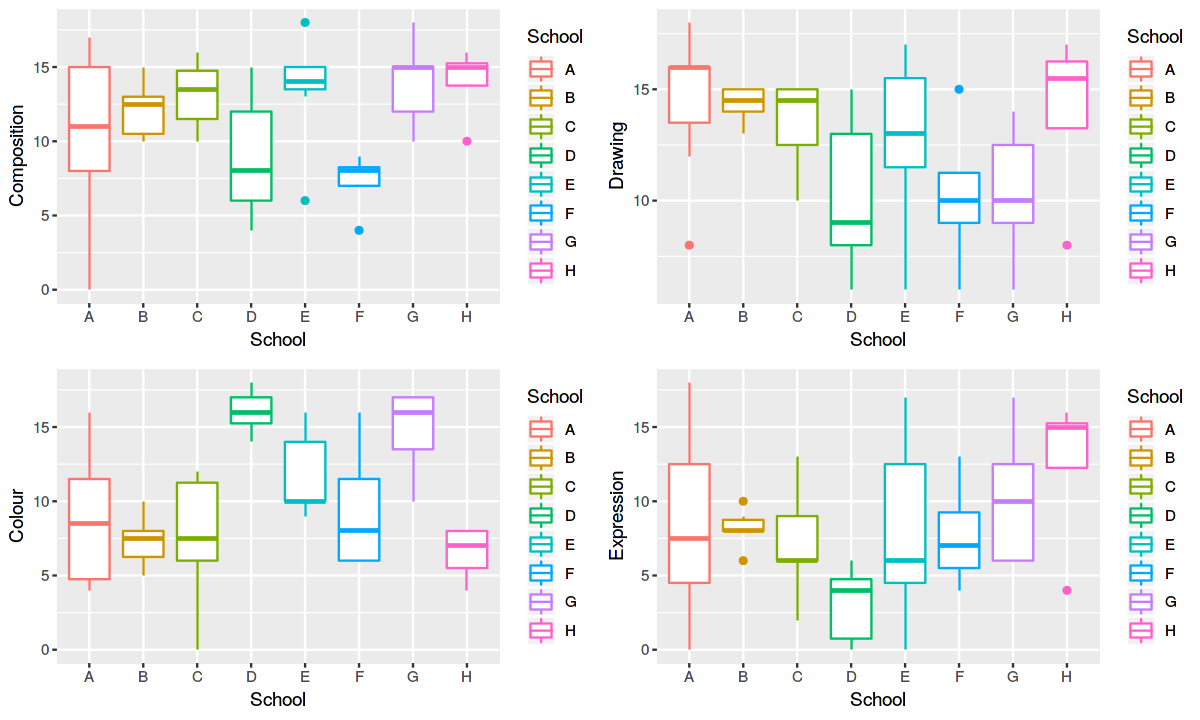

In [3]:


pComposition <- ggplot(data = painters.df,
       aes(x = School, 
           y = Composition,
          colour= School)) + 
    geom_boxplot()

pDrawing <- ggplot(data = painters.df,
       aes(x = School, 
           y = Drawing,
          colour= School)) + 
    geom_boxplot()

pColour <- ggplot(data = painters.df,
       aes(x = School, 
           y = Colour,
          colour= School)) + 
    geom_boxplot()

pExpression <- ggplot(data = painters.df,
       aes(x = School, 
           y = Expression,
          colour= School)) + 
    geom_boxplot()


grid.arrange(pComposition,pDrawing,pColour,pExpression,nrow=2)

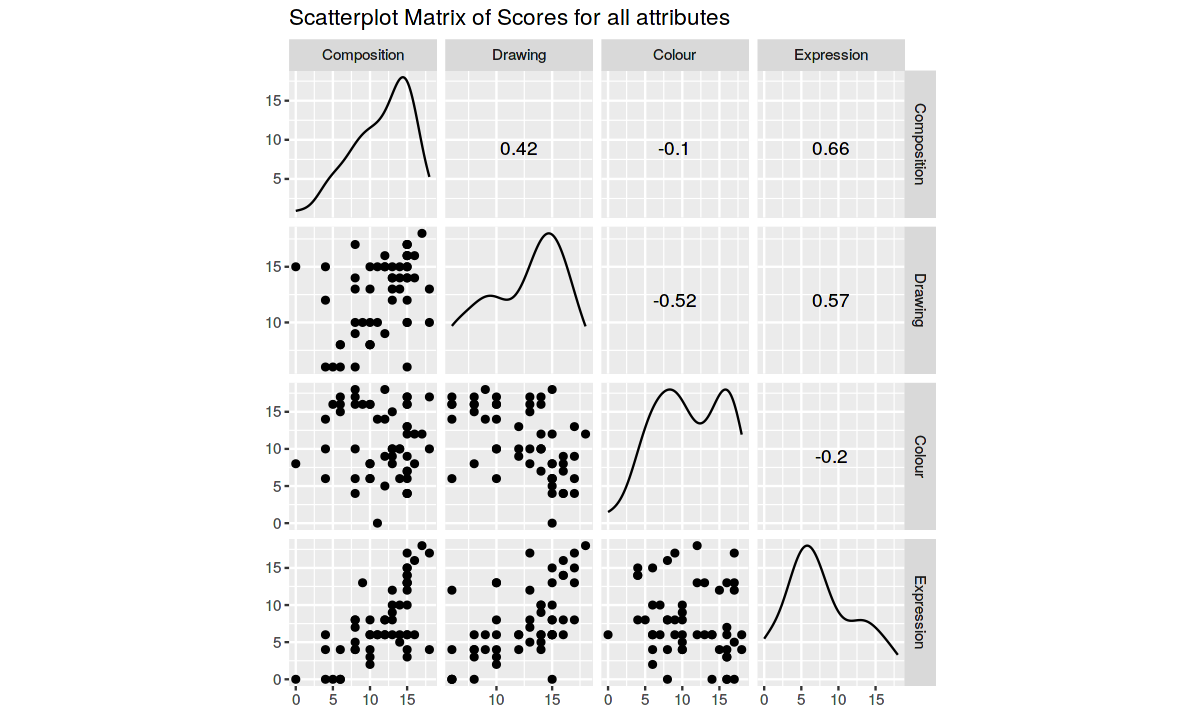

In [4]:
spm <- ggscatmat(data=painters.df,columns=2:5)+ggtitle("Scatterplot Matrix of Scores for all attributes")
spm

In [5]:
library(ggcorrplot,lib.loc='.')

,Composition,Drawing,Colour,Expression
Composition,1.00000000,0.4154456,-0.09758818,0.6571846
Drawing,0.41544563,1.0000000,-0.51696052,0.5737066
Colour,-0.09758818,-0.5169605,1.00000000,-0.1995179
Expression,0.65718460,0.5737066,-0.19951793,1.0000000


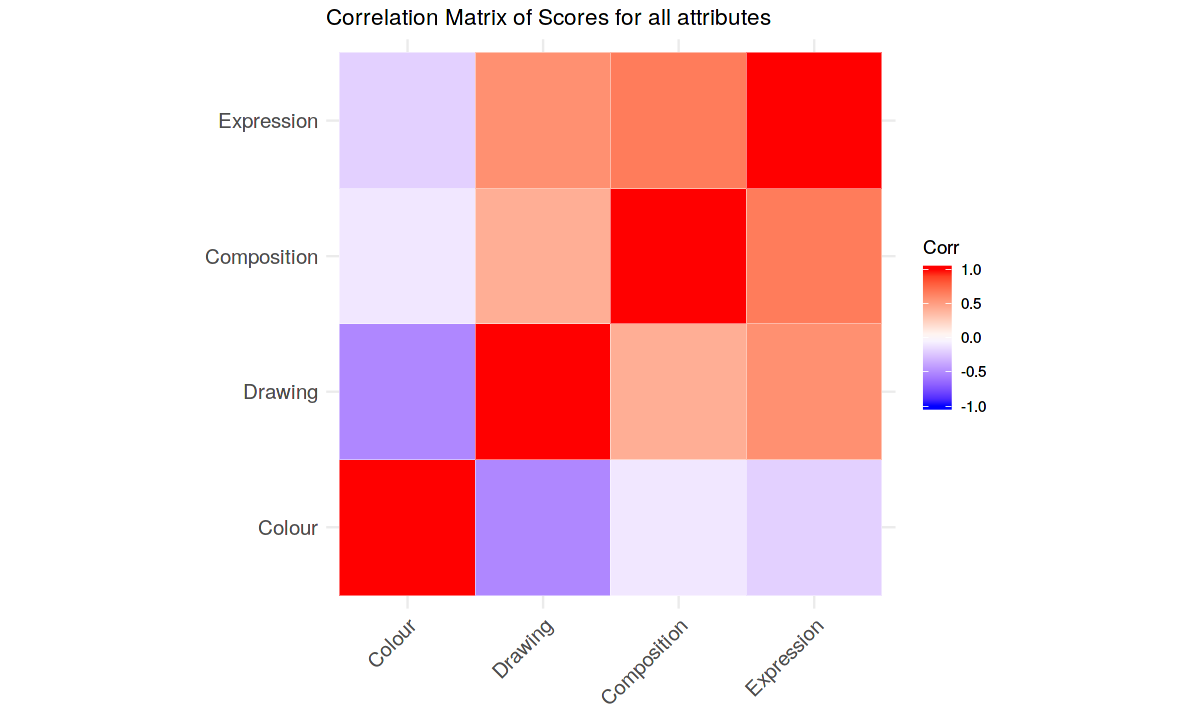

In [6]:
aa=cor(painters.df[,2:5])
aa
ggcorrplot(aa,hc.order = TRUE,outline.col = "white")+ggtitle("Correlation Matrix of Scores for all attributes")

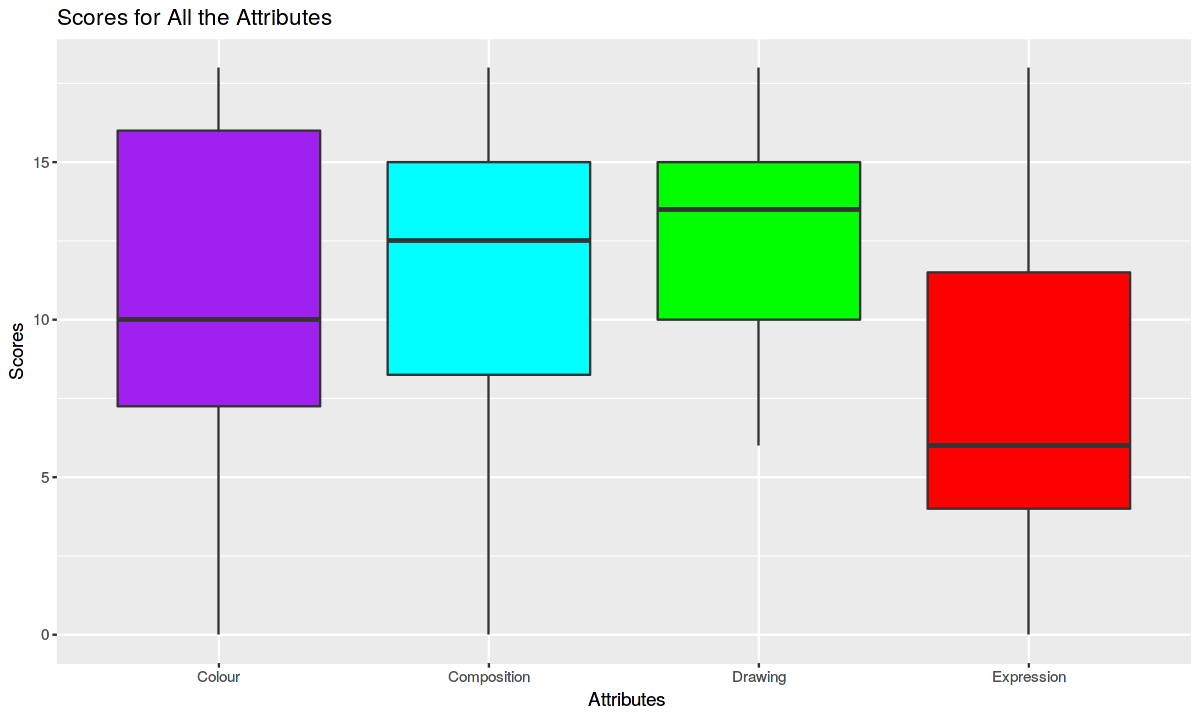

In [7]:
w <- ggplot(data=painters.df)
w+geom_boxplot(aes(x="Composition",y=Composition), fill="cyan")+
  geom_boxplot(aes(x="Drawing", y=Drawing), fill="green")+
  geom_boxplot(aes(x="Colour", y=Colour), fill="purple")+
  geom_boxplot(aes(x="Expression", y=Expression), fill="red")+
  xlab(" Attributes")+ylab("Scores")+
  ggtitle("Scores for All the Attributes")

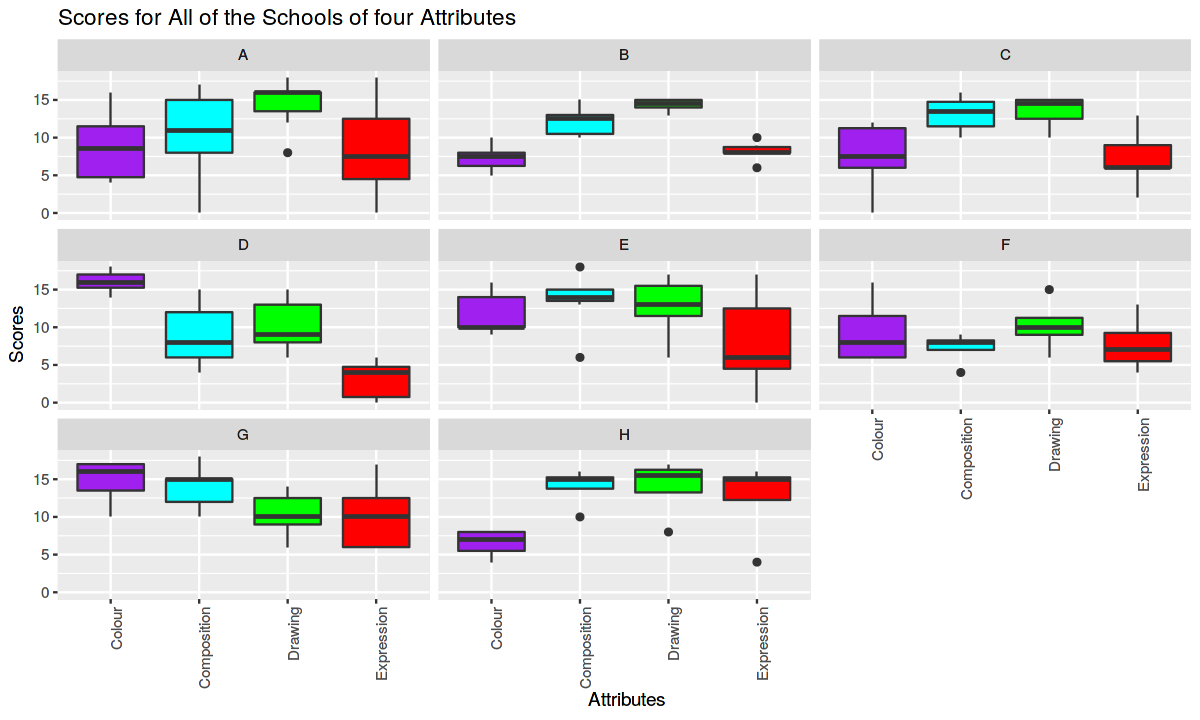

In [8]:
w <- ggplot(data=painters.df)
w+geom_boxplot(aes(x="Composition",y=Composition), fill="cyan")+
  geom_boxplot(aes(x="Drawing", y=Drawing), fill="green")+
  geom_boxplot(aes(x="Colour", y=Colour), fill="purple")+
  geom_boxplot(aes(x="Expression", y=Expression), fill="red")+
  xlab(" Attributes")+ylab("Scores")+
  ggtitle("Scores for All of the Schools of four Attributes")+
  facet_wrap(~School)+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [9]:
paintersLong.df <- gather(data=painters.df, Attributes,Scores, -Artist, -School)
paintersLong.df

Artist,School,Attributes,Scores
Da Udine,A,Composition,10
Da Vinci,A,Composition,15
Del Piombo,A,Composition,8
Del Sarto,A,Composition,12
Fr. Penni,A,Composition,0
Guilio Romano,A,Composition,15
Michelangelo,A,Composition,8
Perino del Vaga,A,Composition,15
Perugino,A,Composition,4
Raphael,A,Composition,17


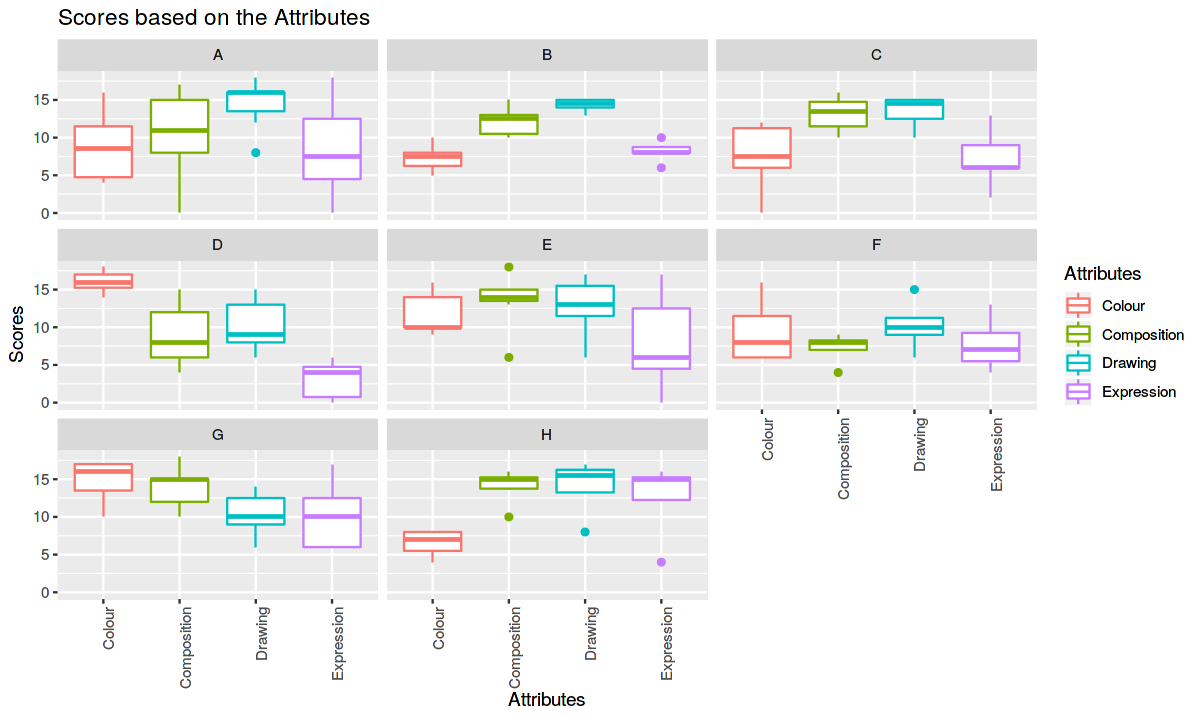

In [10]:
bp2 <- ggplot(data=paintersLong.df, 
             aes(x=Attributes,
                 y= Scores,
                 colour=Attributes))
bp2 + geom_boxplot()+
  ggtitle("Scores based on the Attributes")+
  facet_wrap(~School)+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

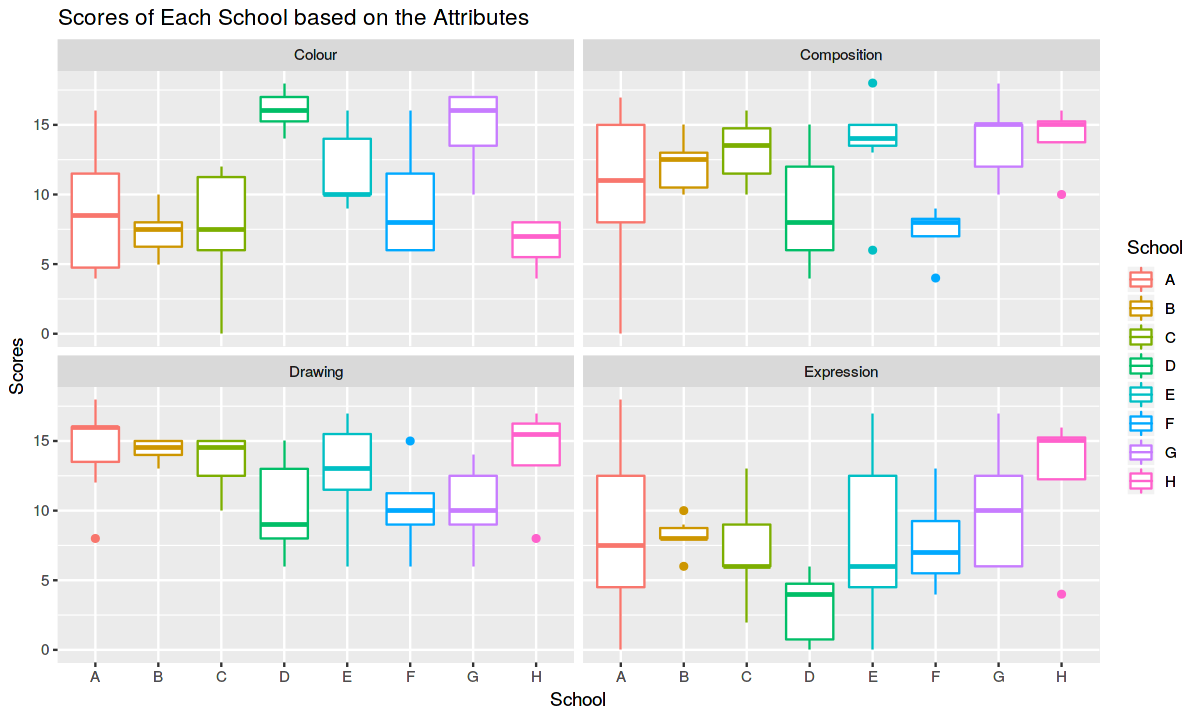

In [11]:
bp1 <- ggplot(data=paintersLong.df, 
             aes(x=School,
                 y= Scores,
                 colour=School))
bp1 + geom_boxplot()+
  ggtitle("Scores of Each School based on the Attributes")+
  facet_wrap(~Attributes)

In [12]:
library(ggrepel)

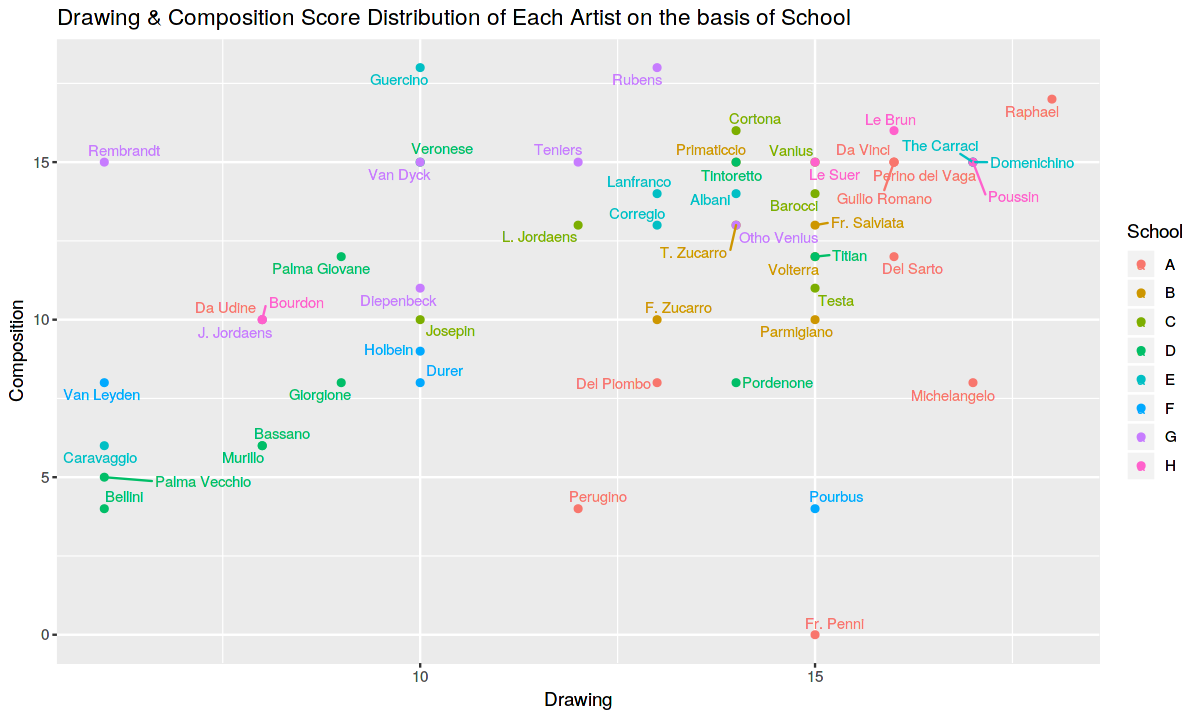

In [31]:
sp <- ggplot(data=painters.df,
            aes(x=Drawing,
                y=Composition,
                colour=School,
                label=Artist))+
geom_point()+
xlab("Drawing")+ylab("Composition")+
ggtitle("Drawing & Composition Score Distribution of Each Artist on the basis of School")+
geom_text_repel(aes(label=Artist),size=3)
sp

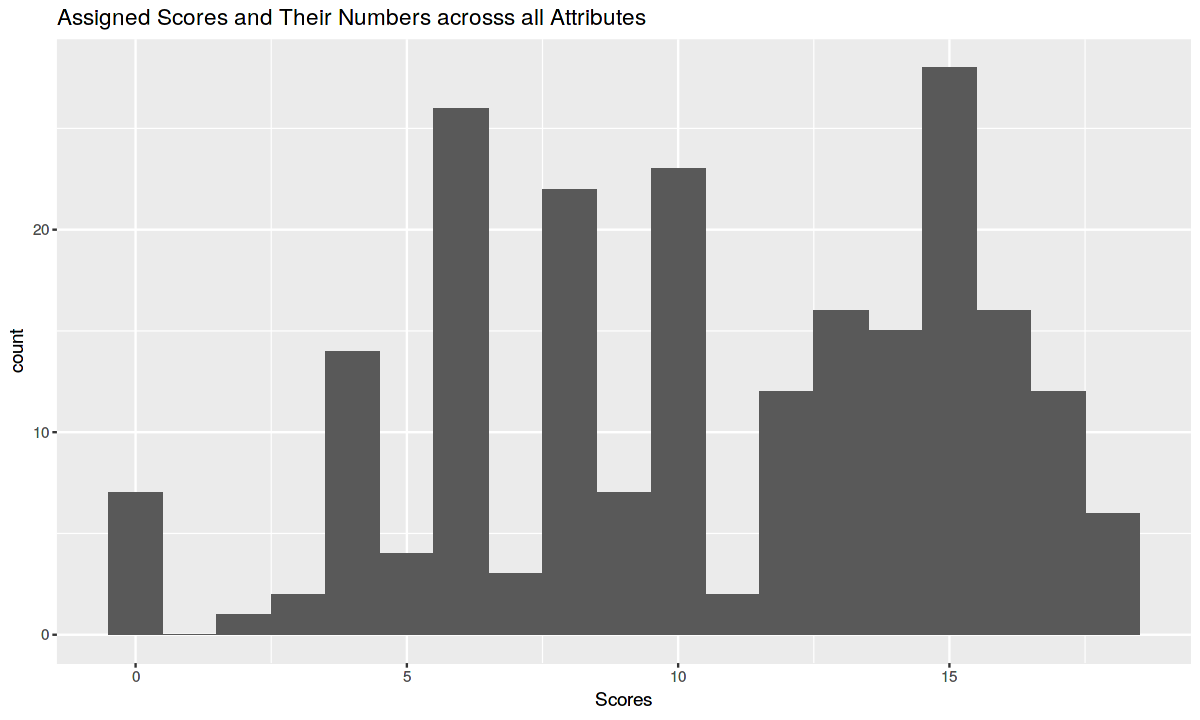

In [14]:
hist<- ggplot(data = paintersLong.df,
            aes(x=Scores))+
  geom_histogram(binwidth = 1)+ggtitle("Assigned Scores and Their Numbers acrosss all Attributes") 
hist